##### PAPER

In [1]:
from random import choice,randint
import networkx as nx

In [2]:
def properlyColored(G,u,D):
    return len(G[u].values())==G.degree(u) and all(color in range(D) for
                                                        color in G[u].values())

In [3]:
def checkEdgeColoring(G,D):
    return all(properlyColored(G,u,D) for u in G.nodes())

In [4]:
def conflictLevel(G,u): 
    return G.degree(u)-len(G[u].values())

In [5]:
def createConflictDictionary(G,D):
    conflict_dictionary=dict([(i,set([])) for i in range(1,D)])
    for u in G.nodes():
        conflict_level_u=conflictLevel(G,u)
        if conflict_level_u>0: conflict_dictionary[conflict_level_u].add(u)
    return conflict_dictionary

In [6]:
def updateConflictDictionary(G,u,conflict_dictionary,old_conflict_level_u):
    conflict_level_u=conflictLevel(G,u)
    if old_conflict_level_u>0:
        conflict_dictionary[old_conflict_level_u].remove(u)
    if conflict_level_u>0:
        conflict_dictionary[conflict_level_u].add(u)
    return conflict_level_u-old_conflict_level_u

In [7]:
def maxConflictLevel(conflict_dictionary):
    return max([conflict_level for conflict_level in conflict_dictionary
                if len(conflict_dictionary[conflict_level])>0])

In [8]:
def totalNumberOfConflicts(conflict_dictionary):
    return sum(conflict_level*len(conflict_dictionary[conflict_level])
               for conflict_level in conflict_dictionary)

In [9]:
def colorEdgeAndUpdate(G,u,v,color,conflict_dictionary):
    old_conflict_level_u=conflictLevel(G,u)
    old_conflict_level_v=conflictLevel(G,v)
    G[u][v]=G[v][u]=color
    updateConflictDictionary(G,u,
                             conflict_dictionary,
                             old_conflict_level_u)
    return updateConflictDictionary(G,v,
                                    conflict_dictionary,
                                    old_conflict_level_v)

In [10]:
def KempeNext(G,last,node,new_color,conflict_dictionary):
    available_for_next=[w for w in G[node] if w!=last
                                           and G[node][w]==new_color]
    if available_for_next==[]: next_node=None
    else: next_node=choice(available_for_next)
    old_color=G[last][node]
    conflict_level_variation=colorEdgeAndUpdate(G,last,node,new_color,
                                                conflict_dictionary)
    return conflict_level_variation,old_color,next_node

In [11]:
def KempeStep(G,last,node,new_color,conflict_dictionary):
    conflict_level_variation,old_color,next_node=KempeNext(G,last,node,
new_color,
                                                           conflict_dictionary)
    if conflict_level_variation<0 or next_node==None: return node,None,None
    return node,next_node,old_color

In [12]:
def KempeProcess(G,last,node,new_color,conflict_dictionary):
    Kempe_chain=set([])
    while new_color!=None and last not in Kempe_chain:
        Kempe_chain.add(last)
        last,node,new_color=KempeStep(G,last,node,new_color,
                                      conflict_dictionary)

In [13]:
def KempeStart(G,D,node,conflict_dictionary):
    colors=set(range(D))
    next_node=None
    for adjacent in G[node]:
        edge_color=G[node][adjacent]
        if edge_color in colors: colors.remove(edge_color)
        else: next_node=adjacent
    if next_node!=None:
        KempeProcess(G,node,next_node,choice(list(colors)),conflict_dictionary)

In [14]:
def preColoring(G,D): #Pre-coloring with a greedy algorithm
    for e in G.edges(): 
        G[e[0]][e[1]]=G[e[1]][e[0]]=None
    for e in G.edges():
        available_colors=set(range(D))
        available_colors-=set(G[e[0]].values())
        available_colors-=set(G[e[1]].values())
        if available_colors==set(): 
            G[e[0]][e[1]]=G[e[1]][e[0]]=randint(0,D-1)
        else: 
            G[e[0]][e[1]]=G[e[1]][e[0]]=choice(list(available_colors))

def preColoring(G,D): #Random pre-coloring
  for e in G.edges(): 
      rand_val = randint(0,D-1)
      G[e[0]][e[1]]['value']=rand_val
      G[e[1]][e[0]]['value']=rand_val

In [15]:
def heuristic(G,D,repetition_limit):
    repetitionCounter=0
    conflict_dictionary=createConflictDictionary(G,D)
    previous=current=totalNumberOfConflicts(conflict_dictionary)
    while previous>0:
        highest_conflict_level=maxConflictLevel(conflict_dictionary)
        node=choice(list(conflict_dictionary[highest_conflict_level]))
        KempeStart(G,D,node,conflict_dictionary)
        current=totalNumberOfConflicts(conflict_dictionary)
        if current==0: return True
        if current>=previous:
            repetitionCounter+=1
            if repetitionCounter>repetition_limit: return False
        else: repetitionCounter=0
        previous=min(previous,current)
    return True

In [16]:
def applyHeuristic(G,D,repetition_limit,iteration_limit):
    preColoring(G,D)
    number_of_iterations=1
    while not heuristic(G,D,repetition_limit):
        if number_of_iterations>iteration_limit: break
        preColoring(G,D)
        number_of_iterations+=1
    print("Number of iterations:",number_of_iterations)
    print("Edge-coloring successful:",checkEdgeColoring(G,D))

In [21]:
repetition_limit=iteration_limit=500
NUMBER_OF_VERTICES=10
DEGREE=2
# G=nx.random_regular_graph(DEGREE,NUMBER_OF_VERTICES)

G = nx.cycle_graph(NUMBER_OF_VERTICES)

nx.set_edge_attributes(G, [], "value")


applyHeuristic(G,DEGREE,repetition_limit,iteration_limit)

Number of iterations: 1
Edge-coloring successful: False


In [22]:
for u,v in G.edges():
    print(f'{u}-{v}:',G[u][v]['value'])

0-1: 0
0-9: 0
1-2: 1
2-3: 0
3-4: 0
4-5: 0
5-6: 0
6-7: 1
7-8: 0
8-9: 1


In [23]:
colors_set = ['r', 'b', 'g', 'p']

H = nx.Graph()

for u,v in G.edges:
    H.add_edge(u,v, color = colors_set[G[u][v]['value']])

colors = [H[u][v]['color'] for u,v in G.edges]

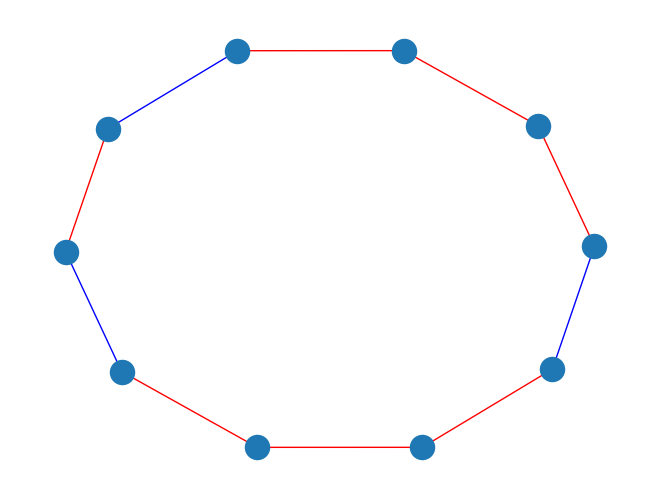

In [24]:
nx.draw(H,edge_color=colors)

In [26]:
import numpy as np
import tensorflow as tf
import time

#### Line Graph

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

In [29]:
def edge_coloring_line_graph(G, strategy='largest_first', interchange = False):
    LG = nx.line_graph(G)
    colors = nx.greedy_color(LG, 
                             strategy=strategy, 
                             interchange=interchange)
    edge_colors = [(u,v, colors[(u,v)]) for u,v in colors.keys()]
    
    number_of_colors = max([x[2] for x in edge_colors])+1

    return edge_colors, number_of_colors

def colored_graph(edge_colors):
    color_set = [
        "#FF5733",  # Coral
        "#33FF57",  # Mint Green
        "#5733FF",  # Royal Blue
        "#FF33A3",  # Hot Pink
        "#33A3FF",  # Sky Blue
        "#FFCA33",  # Gold
        "#33FFCA",  # Turquoise
        "#CA33FF",  # Purple
        "#FF336D",  # Salmon
        "#33FF33",  # Lime Green
        "#FFC300",  # Fluorescent Yellow
        "#C70039",  # Carmine
        "#900C3F",  # Dark Magenta
        "#581845",  # Dark Violet
        "#FF5733",  # Coral
        "#01A368",  # Green-Blue
        "#007FFF",  # Azure
        "#ED9121",  # Tiger's Eye
        "#E30B5C",  # Shocking Pink
        "#4D5D53"   # Slate Gray
    ]
    H = nx.Graph()
    for u,v,w in edge_colors:
        H.add_edge(u,v,color = color_set[w])

    colors = [H[u][v]['color'] for u,v in H.edges()]
    
    plt.figure(dpi = 70)
    nx.draw(H, edge_color=colors, 
            width = 5, 
            node_color = '#8E9699', 
            with_labels = True)
    plt.show()
    


    return H

  

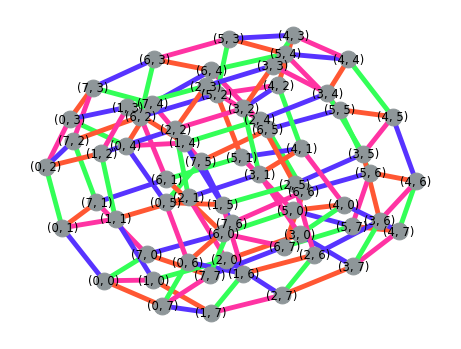

Number of colors: 4


In [52]:
strategy_set = ['largest_first',
'random_sequential',
'smallest_last',
'independent_set',
'connected_sequential_bfs',
'connected_sequential_dfs',
'connected_sequential',
'saturation_largest_first',
'DSATUR']

N = 8
p = .3
G = nx.grid_graph(dim = (N,N), periodic = True)
# G = nx.triangular_lattice_graph(N,N, periodic = True)
# G = nx.cycle_graph(N)
# G = nx.erdos_renyi_graph(N,p)
# G = nx.hypercube_graph(N)
# G = nx.hexagonal_lattice_graph(N,N)
# G = nx.circular_ladder_graph(N)


E,color_n = edge_coloring_line_graph(G, strategy=strategy_set[-1], interchange = False)
H = colored_graph(E)
print('Number of colors:', color_n)

Edge coloring lattice graphs
- https://arxiv.org/abs/2402.08752
- https://github.com/kattemolle/ecolpy

pedritastark/graph-coloring
- https://github.com/pedritastark/graph-coloring/blob/main/__main__.py